# 1. Defining The Goal

The purpose of this project is to do an analysis of the android app market by comparing over 30,0000 apps in google play across different categories. The analysis should give a broad picture and insights to someone who is involved in market research or interested in knowing what strategies to follow in order to launch and sustain a successful app in android market. 

### Overview of Potential Business Questions
The market analysis conducted in this project is intended to provide a reader with results that will give an initial overview of the situation in the market for Android phones.
Below is set of questions that market-researchers, business intelligence team or potential Google Play market entrant is very likely to ask:
1.	What kind of apps have the highest market share?
2.	Is there any specific category dominating the market?
3.	Which categories have the fewest number of apps available?
4.	What is the average rating across all apps in the Google Play market?
5.	Does the price of an app affect its rating?
6.	Do users always prefer free apps over paid apps?

# 2. Get the Data

## Import the libraries

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
import random
import os
import time

In [2]:
data = pd.read_csv("C:/Users/bariu/Desktop/Jenga-Project/Android apps.csv")
print(data.shape)

(37817, 19)


In [3]:
data.head()

,appname,category,category1,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,price,paidapp,rating,numberreviews
0,Netflix,entertainment,entertainment,"netflix, inc.",1,0,0,0,0,0,0,no info,1,500000000,no game,free,0.0,4.5,"7,287,852"
1,Messenger ? Text and Video Chat for Free,communication,communication,facebook,1,0,0,1,0,1,0,everyone,0,1000000000,no game,free,0.0,4.2,"69,050,158"
2,Google Chrome: Fast & Secure,communication,internet browser,google llc,0,0,0,0,1,0,0,everyone,0,5000000,no game,free,0.0,4.3,"17,065,648"
3,Gmail,communication,mail,google llc,0,1,0,0,0,1,0,everyone,0,5000000,no game,free,0.0,4.4,"6,272,191"
4,Grindr - Gay chat,social,dating,grindr llc,1,1,0,0,0,1,0,18+,0,10000000,no game,free,0.0,3.5,"365,432"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37817 entries, 0 to 37816
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appname               37817 non-null  object 
 1   category              37817 non-null  object 
 2   category1             37817 non-null  object 
 3   company               37817 non-null  object 
 4   purchases             37817 non-null  int64  
 5   ads                   37817 non-null  int64  
 6   sharesinfo            37817 non-null  int64  
 7   shareslocation        37817 non-null  int64  
 8   unrestrictedinternet  37817 non-null  int64  
 9   usersinteract         37817 non-null  int64  
 10  game                  37817 non-null  int64  
 11  age_rating            37817 non-null  object 
 12  Parentalguidance      37817 non-null  int64  
 13  Downloads             37817 non-null  int64  
 14  categorygame          37817 non-null  object 
 15  price              

## 3. Clean the Data

Lets look at the columns


In [5]:
# missings data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending =False)
missing_data = pd.concat([total,percent], axis =1, keys =["Total", "percent"])
missing_data.head(6)


,Total,percent
paidapp,529,0.013988
numberreviews,0,0.000000
unrestrictedinternet,0,0.000000
category,0,0.000000
category1,0,0.000000
company,0,0.000000


In [6]:
# convert "error during scraping" values to NaN values
data = data.replace(['error during scraping'],'NaN')


In [7]:
# convert "no info" to NAN
data= data.replace(["no info"], "NaN")

In [8]:
# drop columns with NaN values
data = data.dropna()

In [9]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37288 entries, 0 to 37816
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appname               37288 non-null  object 
 1   category              37288 non-null  object 
 2   category1             37288 non-null  object 
 3   company               37288 non-null  object 
 4   purchases             37288 non-null  int64  
 5   ads                   37288 non-null  int64  
 6   sharesinfo            37288 non-null  int64  
 7   shareslocation        37288 non-null  int64  
 8   unrestrictedinternet  37288 non-null  int64  
 9   usersinteract         37288 non-null  int64  
 10  game                  37288 non-null  int64  
 11  age_rating            37288 non-null  object 
 12  Parentalguidance      37288 non-null  int64  
 13  Downloads             37288 non-null  int64  
 14  categorygame          37288 non-null  object 
 15  price              

In [10]:
#converting 
data.isnull().sum()

appname                 0
category                0
category1               0
company                 0
purchases               0
ads                     0
sharesinfo              0
shareslocation          0
unrestrictedinternet    0
usersinteract           0
game                    0
age_rating              0
Parentalguidance        0
Downloads               0
categorygame            0
price                   0
paidapp                 0
rating                  0
numberreviews           0
dtype: int64

In [11]:
#checking for duplicates in the whole dataset
duplicate = data[data.duplicated()]
print("Duplice Rows :" )
#print the resultant DataFrame
duplicate

Duplice Rows :


,appname,category,category1,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,price,paidapp,rating,numberreviews
37712,Automatic Call Recorder,tools,tools,quantum4u,1,1,0,0,0,1,0,everyone,0,5000000,no game,free,0.0,4.2,"62,542"
37713,BeOne VR Awareness Game,educational,mobilegame,beone development group bv,0,0,0,0,0,0,1,everyone,0,100,educational,free,0.0,rating disabled,rating disabled
37714,Weather,weather,weather,word connect games,1,1,0,0,0,0,0,everyone,0,5000000,no game,free,0.0,4.5,"79,366"
37715,"The Mindfulness App: relax, calm, focus and sleep",health & fitness,health & fitness,mindapps,1,0,0,0,0,0,0,everyone,0,1000000,no game,free,0.0,4.3,"10,039"
37716,Snapchat,social,social,snap inc,1,1,1,0,0,1,0,NaN,1,1000000000,no game,free,0.0,4.3,"20,393,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37812,myHU,education,education,hogeschool utrecht,0,0,0,0,0,0,0,everyone,0,10000,no game,free,0.0,1.6,48
37813,e-PRESS&MORE by Thalys,news & magazines,news & magazines,thalys,1,0,0,0,0,0,0,everyone,0,1000,no game,free,0.0,2.2,26
37814,Dreame,books & reference,books & reference,dreame media,1,0,0,0,0,0,0,16+,0,1000000,no game,free,0.0,4.5,"103,31"
37815,e-PRESS&MORE by Thalys,news & magazines,news & magazines,thalys,1,0,0,0,0,0,0,everyone,0,1000,no game,free,0.0,2.2,26


### colums: appname

In [12]:
#checking for duplicates
duplicate1= data[data.duplicated('appname')]
print("Duplicate Rows :")
#print the resultant Dataframme
duplicate1

Duplicate Rows :


,appname,category,category1,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,price,paidapp,rating,numberreviews
53,Work Log,productivity,productivity,ar productions inc.,1,1,0,0,0,0,0,everyone,0,1000000,no game,free,0.0,4.6,"34,82"
674,Music player,music & audio,music & audio,green apple studio,0,1,0,0,0,0,0,everyone,0,5000000,no game,free,0.0,4.7,"122,07"
746,Bubble Shooter,casual,mobilegame,candy bubble studio,0,1,0,0,0,0,1,7+,0,50000000,casual,free,0.0,4.3,"426,723"
759,Expense Manager,finance,finance,bishinews,0,1,0,0,0,0,0,everyone,0,5000000,no game,free,0.0,4.5,"58,862"
805,File Manager,tools,tools,"mobile, asustek computer inc.",0,1,0,0,0,0,0,everyone,0,100000000,no game,free,0.0,4.4,"778,865"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37812,myHU,education,education,hogeschool utrecht,0,0,0,0,0,0,0,everyone,0,10000,no game,free,0.0,1.6,48
37813,e-PRESS&MORE by Thalys,news & magazines,news & magazines,thalys,1,0,0,0,0,0,0,everyone,0,1000,no game,free,0.0,2.2,26
37814,Dreame,books & reference,books & reference,dreame media,1,0,0,0,0,0,0,16+,0,1000000,no game,free,0.0,4.5,"103,31"
37815,e-PRESS&MORE by Thalys,news & magazines,news & magazines,thalys,1,0,0,0,0,0,0,everyone,0,1000,no game,free,0.0,2.2,26


In [13]:
# removing Duplicates
data = pd.concat([data, duplicate, duplicate1]).drop_duplicates(keep=False)

### column: rating

In [14]:
data["rating"]

2                    4.3
3                    4.4
4                    3.5
5                      4
6                    4.4
              ...       
37707                3.9
37708                3.3
37709    rating disabled
37710                3.9
37711                  3
Name: rating, Length: 36366, dtype: object

In [15]:
#convert "rating disabled" to NaN
data["rating"] = data["rating"].replace(['rating disabled'],'NaN')

In [16]:
# convert rating to float
data["rating"] = data.rating.astype(float)

### Column: price

In [17]:
data["price"]

2                     free
3                     free
4                     free
5                     free
6                     free
               ...        
37707                 free
37708                 free
37709                 free
37710                 free
37711    no info available
Name: price, Length: 36366, dtype: object

In [18]:
#convert "no info available" to NaN
data["price"]= data["price"].replace(["no info available"], "NaN")


In [19]:
#convert "no info" to NaN
data["price"]= data["price"].replace(["no info"], "NaN")

In [20]:
# convert "free" to 0
data["price"]= data["price"].replace(["free"], "0")

In [21]:
#convert price to float
data["price"]= data.price.astype(float)

In [22]:
data.price.value_counts()

0.00      33766
0.59         98
0.99         92
1.99         82
2.99         78
          ...  
254.99        1
1.06          1
25.99         1
4.83          1
4.98          1
Name: price, Length: 162, dtype: int64

### Column: numberreviews

In [23]:
data["numberreviews"]

2             17,065,648
3              6,272,191
4                365,432
5                 111,05
6             57,127,897
              ...       
37707                 13
37708              1,078
37709    rating disabled
37710             80,012
37711                163
Name: numberreviews, Length: 36366, dtype: object

In [24]:
# convert "rating disabled" to NaN
data["numberreviews"]= data["numberreviews"].replace(["rating disabled"], "NaN")

In [25]:
#Removing '+', '.' , 'k', and ','
data.numberreviews=data.numberreviews.apply(lambda x: x.strip('+'))
data.numberreviews=data.numberreviews.apply(lambda x: x.replace(',',''))
data.numberreviews=data.numberreviews.apply(lambda x: x.replace('.',''))
data.numberreviews= data.numberreviews.apply(lambda x: x.replace('k','0'))

In [26]:
#Convert numberreviews to int
data["numberreviews"]= data.numberreviews.astype(float)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36366 entries, 2 to 37711
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appname               36366 non-null  object 
 1   category              36366 non-null  object 
 2   category1             36366 non-null  object 
 3   company               36366 non-null  object 
 4   purchases             36366 non-null  int64  
 5   ads                   36366 non-null  int64  
 6   sharesinfo            36366 non-null  int64  
 7   shareslocation        36366 non-null  int64  
 8   unrestrictedinternet  36366 non-null  int64  
 9   usersinteract         36366 non-null  int64  
 10  game                  36366 non-null  int64  
 11  age_rating            36366 non-null  object 
 12  Parentalguidance      36366 non-null  int64  
 13  Downloads             36366 non-null  int64  
 14  categorygame          36366 non-null  object 
 15  price              

In [28]:
data.age_rating.unique()

array(['everyone', '18+', 'NaN', '16+', '12+', '7+'], dtype=object)

## 4. Find insights and Visualize

### a) Most popular category

we will vizualize the data to see which is the most popular category

lets count the amount of each category in the data set

In [29]:
print(data.category1.unique())
print("\n the amount of unique categories is: ", len(data.category1.unique()))

['internet browser' 'mail' 'dating' 'video players & editors'
 'productivity' 'travel & local' 'finance' 'business' 'photography'
 'social' 'medical' 'shopping' 'tools' 'communication' 'lifestyle'
 'health & fitness' 'food & drink' 'weather' 'entertainment'
 'music & audio' 'maps & navigation' 'news & magazines' 'house & home'
 'sms' 'sports' 'mobilegame' 'personalization' 'education'
 'books & reference' 'auto & vehicles' 'art & design' 'events'
 'libraries & demo' 'dialer' 'parenting' 'beauty' 'comics' 'phonecall']

 the amount of unique categories is:  38


In [30]:
amount = data.groupby("category1").count()
amount.head(6)

,appname,category,company,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,categorygame,price,paidapp,rating,numberreviews
category1,,,,,,,,,,,,,,,,,,
art & design,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,146,146
auto & vehicles,287,287,287,287,287,287,287,287,287,287,287,287,287,287,273,287,264,264
beauty,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,48,48
books & reference,640,640,640,640,640,640,640,640,640,640,640,640,640,640,630,640,606,606
business,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1187,1161,1187,1010,1010
comics,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77


All the values in the column are same indicating the number of apps in each category

Visualizing the data:

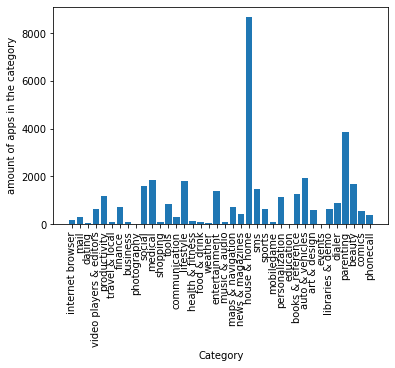

In [31]:
plt.bar(data.category1.unique(), amount["appname"])
plt.ylabel("amount of apps in the category")
plt.xlabel("Category")
plt.xticks(rotation = 90);

As seen from the plot, amount of house & home apps is the highest

#### Result:

The most popular category in this dateset is house & Home

### b) The company producing the highest number of apps in the apps store

we will look at the Company column to determine which company has the highest number of apps

In [32]:
company1 = data['company'].value_counts()
top_company =company1.head(10)
top_company


google llc                       128
ketchapp                          96
samsung electronics co., ltd.     59
mobirix                           58
voodoo                            58
tapps games                       57
microsoft corporation             55
choice of games llc               49
hosted games                      43
gameloft se                       38
Name: company, dtype: int64

<AxesSubplot:>

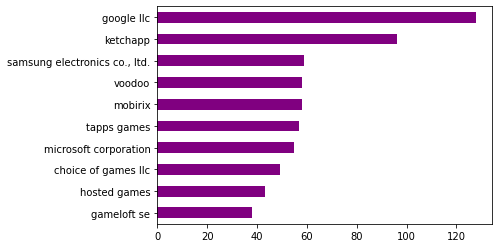

In [35]:
top_company.sort_values().plot(kind= "barh", color = "purple")

#### Result 
google has the most apps developed according to the dataset